# Steps in machine learning

-  Business Understanding
-  Data Understading
-  Data preparation and preprocessing
-  Modeling
-  Model Evaluation 
-  Deployment


# Data Understanding

In [54]:
import pandas as pd

In [55]:
df = pd.read_csv("regression.csv")

In [56]:
df.head()

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount
0,2019,Jan,CC100,1000000,Product Sales,Revenue,1344.051
1,2019,Jan,CC100,1000001,Licensing Revenue,Revenue,480.968
2,2019,Jan,CC100,1000002,Service Revenue,Revenue,650.820
3,2019,Jan,CC100,1000004,Fee Revenue,Revenue,339.360
4,2019,Jan,CC100,2000000,Cost of Good Sold,Expense,1125.328


In [57]:
df.tail()

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount
4207,2021,Dec,CC302,2000005,Purchases,Expense,698.121
4208,2021,Dec,CC302,3000000,Cash at Bank,Asset,-282.056
4209,2021,Dec,CC302,3000001,Inventory,Asset,537.478
4210,2021,Dec,CC302,3000002,Accounts Receivable,Asset,1152.680
4211,2021,Dec,CC302,4000001,Accounts Payable,Liability,-1020.000


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4212 entries, 0 to 4211
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 4212 non-null   int64  
 1   Month                4212 non-null   object 
 2   Cost Centre          4212 non-null   object 
 3   Account              4212 non-null   int64  
 4   Account Description  4212 non-null   object 
 5   Account Type         4212 non-null   object 
 6   Amount               4212 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 230.5+ KB


In [59]:
df.columns

Index(['Year', 'Month', 'Cost Centre', 'Account', 'Account Description',
       'Account Type', 'Amount'],
      dtype='object')

In [60]:
df["Account"].unique()

array([1000000, 1000001, 1000002, 1000004, 2000000, 2000001, 2000002,
       2000003, 2000005, 3000000, 3000001, 3000002, 4000001], dtype=int64)

In [61]:
for  col in df.columns:
    print(col,len(df[col].unique()),df[col].unique())
    

Year 3 [2019 2020 2021]
Month 12 ['Jan' 'Feb' 'Mar' 'Apr' 'May' 'Jun' 'Jul' 'Aug' 'Sep' 'Oct' 'Nov' 'Dec']
Cost Centre 9 ['CC100' 'CC101' 'CC102' 'CC200' 'CC201' 'CC202' 'CC300' 'CC301' 'CC302']
Account 13 [1000000 1000001 1000002 1000004 2000000 2000001 2000002 2000003 2000005
 3000000 3000001 3000002 4000001]
Account Description 13 ['Product Sales' 'Licensing Revenue' 'Service Revenue' 'Fee Revenue'
 'Cost of Good Sold' 'Staff Expenses' 'Technology Expenses'
 'Property Expenses' 'Purchases' 'Cash at Bank' 'Inventory'
 'Accounts Receivable' 'Accounts Payable']
Account Type 4 ['Revenue' 'Expense' 'Asset' 'Liability']
Amount 3956 [1344.051  480.968  650.82  ... -282.056  537.478 1152.68 ]


In [62]:
df.describe()

,Year,Account,Amount
count,4212.000000,4.212000e+03,4212.000000
mean,2020.000000,2.076925e+06,476.470421
std,0.816594,9.167528e+05,477.296234
min,2019.000000,1.000000e+06,-1020.000000
25%,2019.000000,1.000004e+06,268.044500
50%,2020.000000,2.000002e+06,512.998500
75%,2021.000000,3.000000e+06,755.960250
max,2021.000000,4.000001e+06,2378.880000


In [63]:
df.dtypes

Year                     int64
Month                   object
Cost Centre             object
Account                  int64
Account Description     object
Account Type            object
Amount                 float64
dtype: object

##### VISUALIZATION OF THE DATA

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

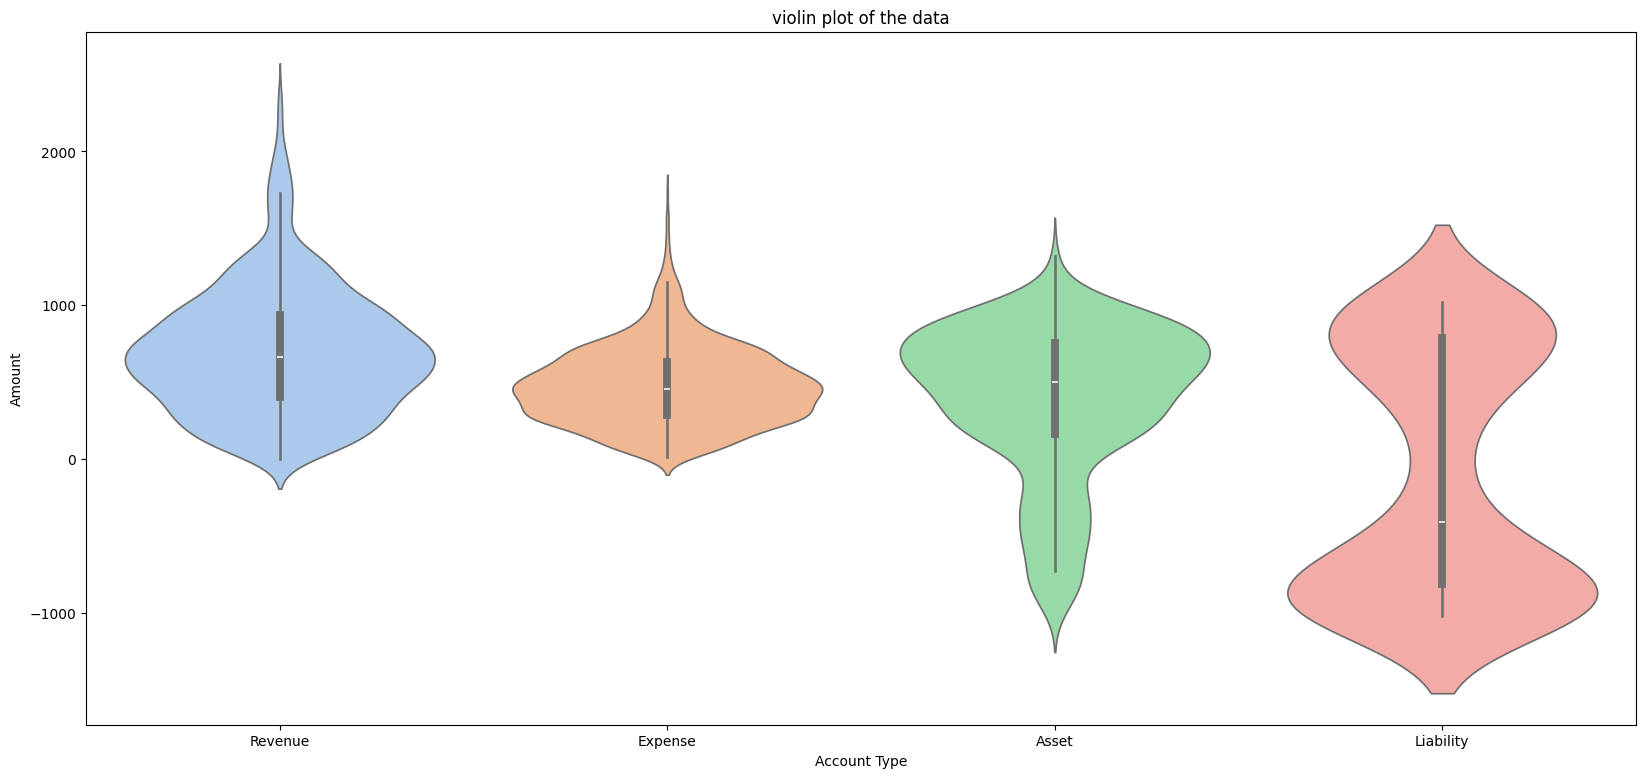

In [65]:
plt.figure(figsize=(20,9))
sns.violinplot(x='Account Type' , y = 'Amount' ,hue = "Account Type", data = df , palette= 'pastel').set_title("violin plot of the data")
plt.show()

#### Review trends

In [66]:
df.head()

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount
0,2019,Jan,CC100,1000000,Product Sales,Revenue,1344.051
1,2019,Jan,CC100,1000001,Licensing Revenue,Revenue,480.968
2,2019,Jan,CC100,1000002,Service Revenue,Revenue,650.820
3,2019,Jan,CC100,1000004,Fee Revenue,Revenue,339.360
4,2019,Jan,CC100,2000000,Cost of Good Sold,Expense,1125.328


In [67]:
monthmap = {
    'Jan': 1,
    'Feb': 2,
    'Mar': 3,
    'Apr': 4,
    'May': 5,
    'Jun': 6,
    'Jul': 7,
    'Aug': 8,
    'Sep': 9,
    'Oct': 10,
    'Nov': 11,
    'Dec': 12
}


In [68]:
monthmap['Jan']

1

In [69]:
df["Period"] = df["Month"].apply(lambda x: monthmap[x])

In [70]:
df[df["Month"] == "Feb"].head()

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount,Period
117,2019,Feb,CC100,1000000,Product Sales,Revenue,919.749,2
118,2019,Feb,CC100,1000001,Licensing Revenue,Revenue,398.591,2
119,2019,Feb,CC100,1000002,Service Revenue,Revenue,1091.767,2
120,2019,Feb,CC100,1000004,Fee Revenue,Revenue,489.903,2
121,2019,Feb,CC100,2000000,Cost of Good Sold,Expense,448.411,2


In [71]:
df["Day"] = 1

In [72]:
df

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount,Period,Day
0,2019,Jan,CC100,1000000,Product Sales,Revenue,1344.051,1,1
1,2019,Jan,CC100,1000001,Licensing Revenue,Revenue,480.968,1,1
2,2019,Jan,CC100,1000002,Service Revenue,Revenue,650.820,1,1
3,2019,Jan,CC100,1000004,Fee Revenue,Revenue,339.360,1,1
4,2019,Jan,CC100,2000000,Cost of Good Sold,Expense,1125.328,1,1
...,...,...,...,...,...,...,...,...,...
4207,2021,Dec,CC302,2000005,Purchases,Expense,698.121,12,1
4208,2021,Dec,CC302,3000000,Cash at Bank,Asset,-282.056,12,1
4209,2021,Dec,CC302,3000001,Inventory,Asset,537.478,12,1
4210,2021,Dec,CC302,3000002,Accounts Receivable,Asset,1152.680,12,1


In [73]:
df["Date"] = df["Year"].astype(str)+"-"+df["Period"].astype(str)+"-"+df["Day"].astype(str)

In [74]:
df.head()

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount,Period,Day,Date
0,2019,Jan,CC100,1000000,Product Sales,Revenue,1344.051,1,1,2019-1-1
1,2019,Jan,CC100,1000001,Licensing Revenue,Revenue,480.968,1,1,2019-1-1
2,2019,Jan,CC100,1000002,Service Revenue,Revenue,650.820,1,1,2019-1-1
3,2019,Jan,CC100,1000004,Fee Revenue,Revenue,339.360,1,1,2019-1-1
4,2019,Jan,CC100,2000000,Cost of Good Sold,Expense,1125.328,1,1,2019-1-1


In [75]:
df.dtypes


Year                     int64
Month                   object
Cost Centre             object
Account                  int64
Account Description     object
Account Type            object
Amount                 float64
Period                   int64
Day                      int64
Date                    object
dtype: object

In [76]:
df["Date"] = pd.to_datetime(df["Date"])

In [77]:
df.dtypes

Year                            int64
Month                          object
Cost Centre                    object
Account                         int64
Account Description            object
Account Type                   object
Amount                        float64
Period                          int64
Day                             int64
Date                   datetime64[ns]
dtype: object

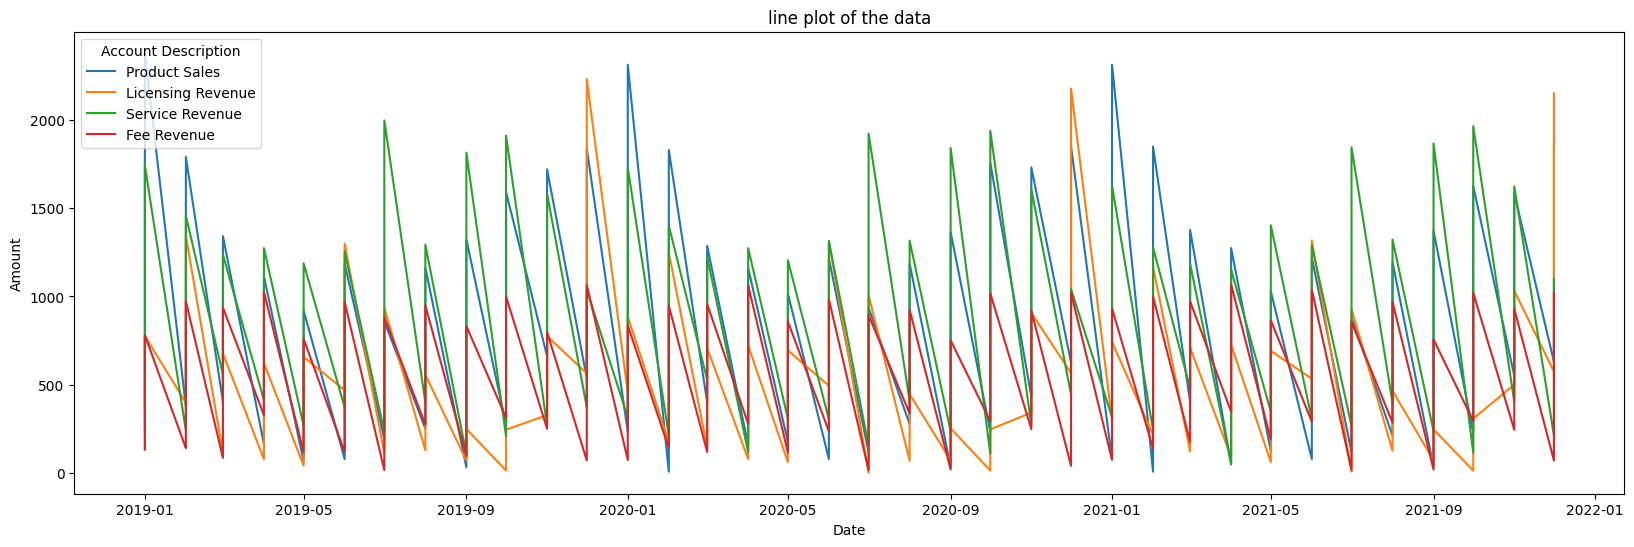

In [78]:
plt.figure(figsize=(20,6))
sns.lineplot(x = 'Date', y = 'Amount' , hue = "Account Description" ,estimator= None, data = df[df["Account Type"] == "Revenue"] ).set_title("line plot of the data")
plt.show()

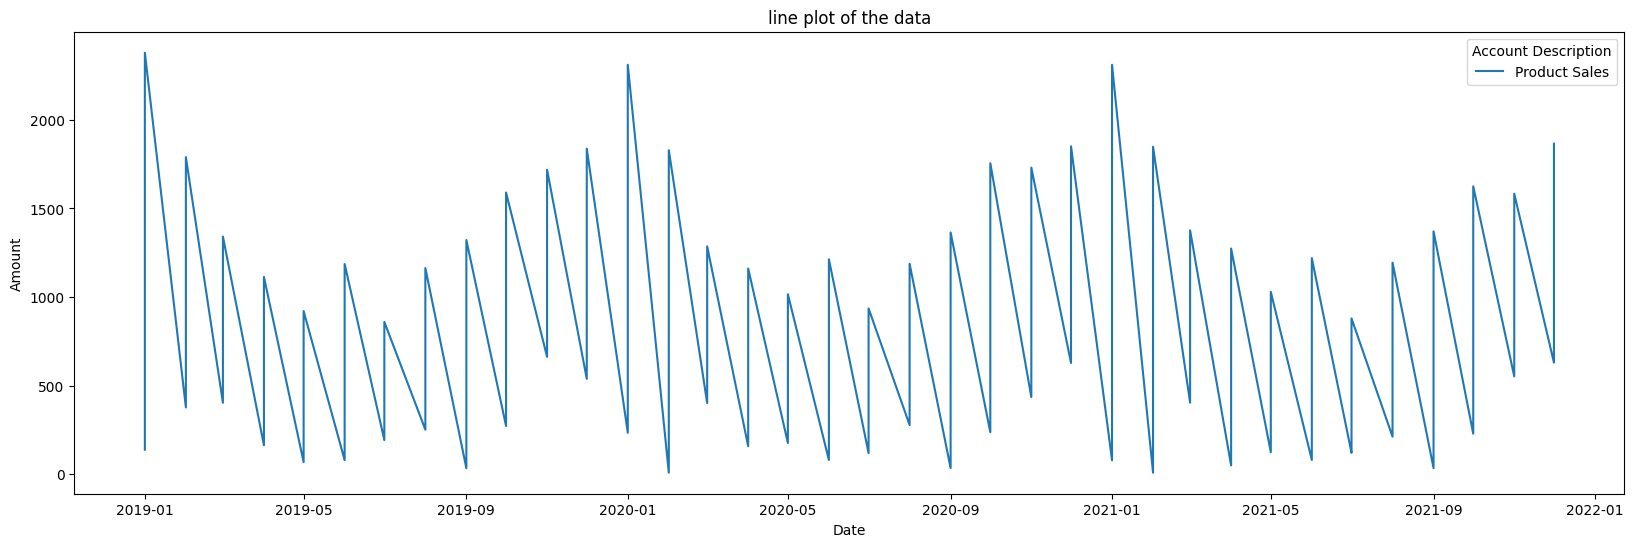

In [79]:
plt.figure(figsize=(20,6))
sns.lineplot(x = 'Date', y = 'Amount' , hue = "Account Description" ,estimator= None, data = df[df["Account Description"] == "Product Sales"]).set_title("line plot of the data")
plt.show()

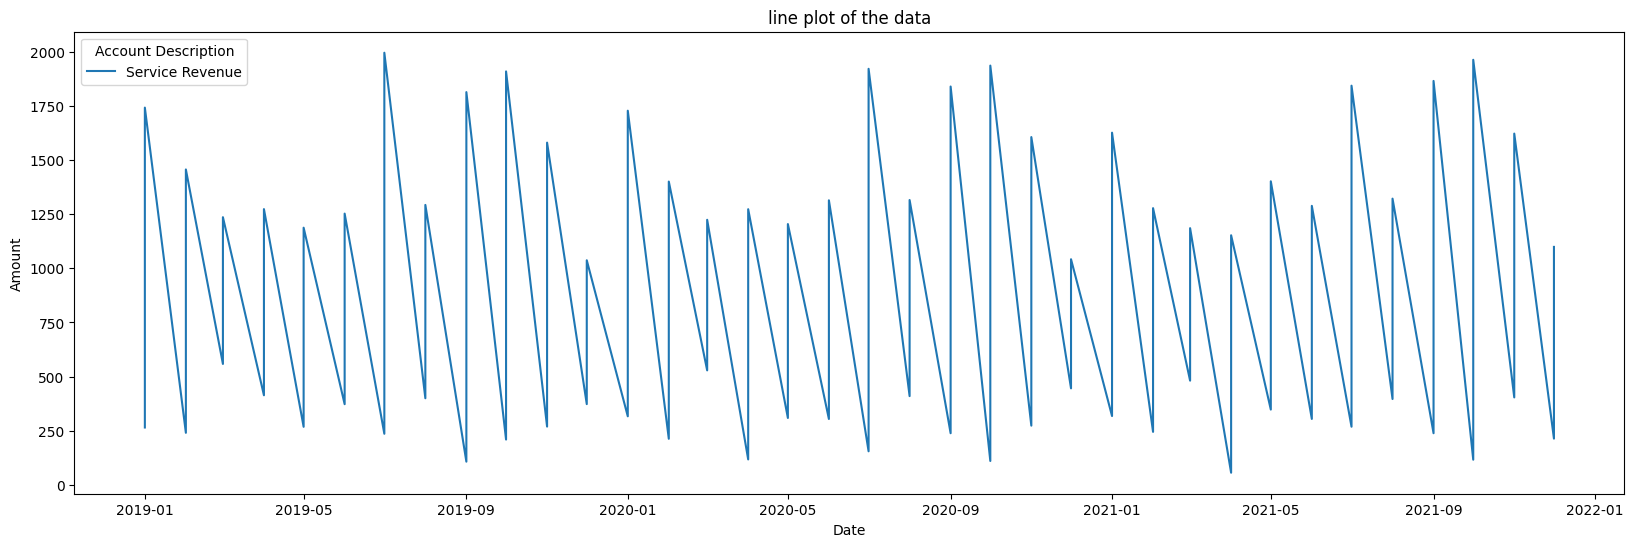

In [80]:
plt.figure(figsize=(20,6))
sns.lineplot(x = 'Date', y = 'Amount' , hue = "Account Description" ,estimator= None, data = df[df["Account Description"] == "Service Revenue"] ).set_title("line plot of the data")
plt.show()

In [81]:
df["Account Description"].unique()

array(['Product Sales', 'Licensing Revenue', 'Service Revenue',
       'Fee Revenue', 'Cost of Good Sold', 'Staff Expenses',
       'Technology Expenses', 'Property Expenses', 'Purchases',
       'Cash at Bank', 'Inventory', 'Accounts Receivable',
       'Accounts Payable'], dtype=object)

In [82]:
pd.get_dummies(df["Account"])

,1000000,1000001,1000002,1000004,2000000,2000001,2000002,2000003,2000005,3000000,3000001,3000002,4000001
0,True,False,False,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,False,False,False
2,False,False,True,False,False,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4207,False,False,False,False,False,False,False,False,True,False,False,False,False
4208,False,False,False,False,False,False,False,False,False,True,False,False,False
4209,False,False,False,False,False,False,False,False,False,False,True,False,False
4210,False,False,False,False,False,False,False,False,False,False,False,True,False


In [83]:
df.head()

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount,Period,Day,Date
0,2019,Jan,CC100,1000000,Product Sales,Revenue,1344.051,1,1,2019-01-01
1,2019,Jan,CC100,1000001,Licensing Revenue,Revenue,480.968,1,1,2019-01-01
2,2019,Jan,CC100,1000002,Service Revenue,Revenue,650.820,1,1,2019-01-01
3,2019,Jan,CC100,1000004,Fee Revenue,Revenue,339.360,1,1,2019-01-01
4,2019,Jan,CC100,2000000,Cost of Good Sold,Expense,1125.328,1,1,2019-01-01


In [84]:
df.join(pd.get_dummies(df["Account"]))

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount,Period,Day,Date,...,1000004,2000000,2000001,2000002,2000003,2000005,3000000,3000001,3000002,4000001
0,2019,Jan,CC100,1000000,Product Sales,Revenue,1344.051,1,1,2019-01-01,...,False,False,False,False,False,False,False,False,False,False
1,2019,Jan,CC100,1000001,Licensing Revenue,Revenue,480.968,1,1,2019-01-01,...,False,False,False,False,False,False,False,False,False,False
2,2019,Jan,CC100,1000002,Service Revenue,Revenue,650.820,1,1,2019-01-01,...,False,False,False,False,False,False,False,False,False,False
3,2019,Jan,CC100,1000004,Fee Revenue,Revenue,339.360,1,1,2019-01-01,...,True,False,False,False,False,False,False,False,False,False
4,2019,Jan,CC100,2000000,Cost of Good Sold,Expense,1125.328,1,1,2019-01-01,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4207,2021,Dec,CC302,2000005,Purchases,Expense,698.121,12,1,2021-12-01,...,False,False,False,False,False,True,False,False,False,False
4208,2021,Dec,CC302,3000000,Cash at Bank,Asset,-282.056,12,1,2021-12-01,...,False,False,False,False,False,False,True,False,False,False
4209,2021,Dec,CC302,3000001,Inventory,Asset,537.478,12,1,2021-12-01,...,False,False,False,False,False,False,False,True,False,False
4210,2021,Dec,CC302,3000002,Accounts Receivable,Asset,1152.680,12,1,2021-12-01,...,False,False,False,False,False,False,False,False,True,False


In [85]:
corredict = {}
for key,rows in df.join(pd.get_dummies(df["Account"])).iterrows():
    corredict[key] = {int(rows["Account"]):rows["Amount"]}

In [86]:
corredict

{0: {1000000: 1344.051},
 1: {1000001: 480.968},
 2: {1000002: 650.82},
 3: {1000004: 339.36},
 4: {2000000: 1125.328},
 5: {2000001: 412.088},
 6: {2000002: 259.488},
 7: {2000003: 376.697},
 8: {2000005: 1105.277},
 9: {3000000: 476.713},
 10: {3000001: 980.0},
 11: {3000002: 385.275},
 12: {4000001: 980.0},
 13: {1000000: 1296.06},
 14: {1000001: 459.764},
 15: {1000002: 512.169},
 16: {1000004: 732.538},
 17: {2000000: 1404.449},
 18: {2000001: 584.214},
 19: {2000002: 306.435},
 20: {2000003: 318.227},
 21: {2000005: 1531.884},
 22: {3000000: 464.197},
 23: {3000001: 980.0},
 24: {3000002: 491.607},
 25: {4000001: 200.0},
 26: {1000000: 244.447},
 27: {1000001: 776.767},
 28: {1000002: 872.102},
 29: {1000004: 690.433},
 30: {2000000: 53.563},
 31: {2000001: 529.574},
 32: {2000002: 450.893},
 33: {2000003: 454.857},
 34: {2000005: 43.042},
 35: {3000000: -296.261},
 36: {3000001: 980.0},
 37: {3000002: 158.931},
 38: {4000001: -980.0},
 39: {1000000: 994.789},
 40: {1000001: 588.

In [87]:
corredict = pd.DataFrame.from_dict(corredict).T.fillna(0)

In [88]:
corredict

,1000000,1000001,1000002,1000004,2000000,2000001,2000002,2000003,2000005,3000000,3000001,3000002,4000001
0,1344.051,0.000,0.00,0.00,0.000,0.0,0.0,0.0,0.000,0.000,0.000,0.00,0.0
1,0.000,480.968,0.00,0.00,0.000,0.0,0.0,0.0,0.000,0.000,0.000,0.00,0.0
2,0.000,0.000,650.82,0.00,0.000,0.0,0.0,0.0,0.000,0.000,0.000,0.00,0.0
3,0.000,0.000,0.00,339.36,0.000,0.0,0.0,0.0,0.000,0.000,0.000,0.00,0.0
4,0.000,0.000,0.00,0.00,1125.328,0.0,0.0,0.0,0.000,0.000,0.000,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4207,0.000,0.000,0.00,0.00,0.000,0.0,0.0,0.0,698.121,0.000,0.000,0.00,0.0
4208,0.000,0.000,0.00,0.00,0.000,0.0,0.0,0.0,0.000,-282.056,0.000,0.00,0.0
4209,0.000,0.000,0.00,0.00,0.000,0.0,0.0,0.0,0.000,0.000,537.478,0.00,0.0
4210,0.000,0.000,0.00,0.00,0.000,0.0,0.0,0.0,0.000,0.000,0.000,1152.68,0.0


In [89]:
corredict.corr()

,1000000,1000001,1000002,1000004,2000000,2000001,2000002,2000003,2000005,3000000,3000001,3000002,4000001
1000000,1.000000,-0.058293,-0.065252,-0.064706,-0.061763,-0.066141,-0.065989,-0.065547,-0.061377,0.007528,-0.070332,-0.060539,0.010549
1000001,-0.058293,1.000000,-0.060742,-0.060233,-0.057494,-0.061569,-0.061428,-0.061016,-0.057135,0.007007,-0.065471,-0.056355,0.009820
1000002,-0.065252,-0.060742,1.000000,-0.067424,-0.064358,-0.068920,-0.068762,-0.068301,-0.063956,0.007844,-0.073287,-0.063083,0.010992
1000004,-0.064706,-0.060233,-0.067424,1.000000,-0.063819,-0.068343,-0.068186,-0.067728,-0.063420,0.007778,-0.072673,-0.062555,0.010900
2000000,-0.061763,-0.057494,-0.064358,-0.063819,1.000000,-0.065235,-0.065085,-0.064648,-0.060536,0.007424,-0.069369,-0.059710,0.010404
2000001,-0.066141,-0.061569,-0.068920,-0.068343,-0.065235,1.000000,-0.069699,-0.069231,-0.064827,0.007951,-0.074286,-0.063942,0.011142
2000002,-0.065989,-0.061428,-0.068762,-0.068186,-0.065085,-0.069699,1.000000,-0.069072,-0.064679,0.007933,-0.074115,-0.063796,0.011116
2000003,-0.065547,-0.061016,-0.068301,-0.067728,-0.064648,-0.069231,-0.069072,1.000000,-0.064244,0.007879,-0.073618,-0.063368,0.011041
2000005,-0.061377,-0.057135,-0.063956,-0.063420,-0.060536,-0.064827,-0.064679,-0.064244,1.000000,0.007378,-0.068935,-0.059337,0.010339
3000000,0.007528,0.007007,0.007844,0.007778,0.007424,0.007951,0.007933,0.007879,0.007378,1.000000,0.008455,0.007277,-0.001268


Text(0.5, 1.0, 'correlation heatmap of the data')

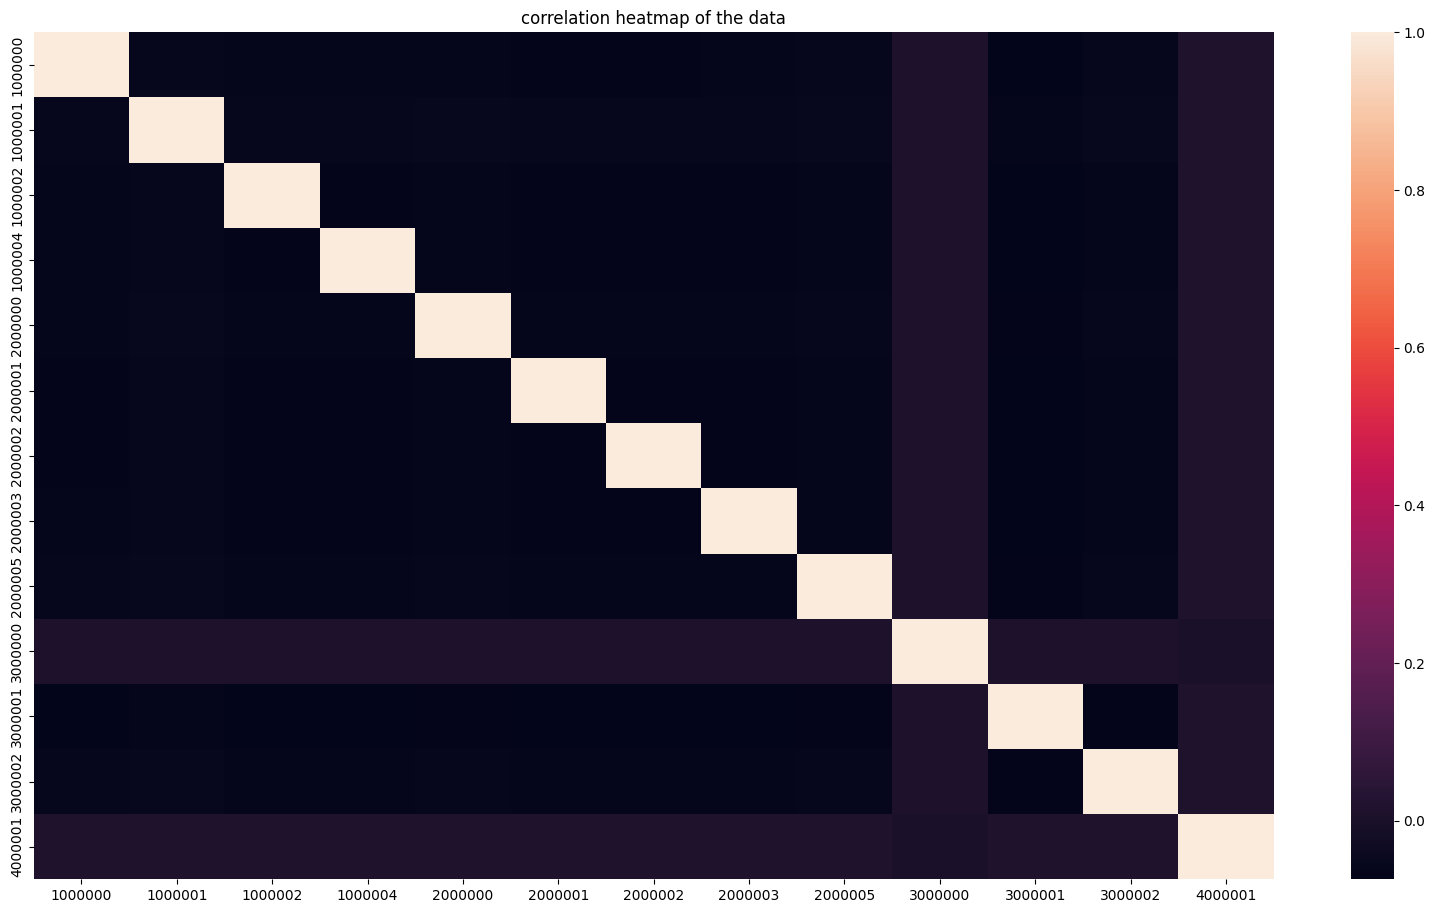

In [98]:
plt.figure(figsize=(20,11))
sns.heatmap(corredict.corr()).set_title("correlation heatmap of the data")

In [99]:
df[df["Account"] == 3000000]

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount,Period,Day,Date
9,2019,Jan,CC100,3000000,Cash at Bank,Asset,476.713,1,1,2019-01-01
22,2019,Jan,CC101,3000000,Cash at Bank,Asset,464.197,1,1,2019-01-01
35,2019,Jan,CC102,3000000,Cash at Bank,Asset,-296.261,1,1,2019-01-01
48,2019,Jan,CC200,3000000,Cash at Bank,Asset,750.000,1,1,2019-01-01
61,2019,Jan,CC201,3000000,Cash at Bank,Asset,187.647,1,1,2019-01-01
...,...,...,...,...,...,...,...,...,...,...
4156,2021,Dec,CC201,3000000,Cash at Bank,Asset,413.616,12,1,2021-12-01
4169,2021,Dec,CC202,3000000,Cash at Bank,Asset,375.657,12,1,2021-12-01
4182,2021,Dec,CC300,3000000,Cash at Bank,Asset,-492.546,12,1,2021-12-01
4195,2021,Dec,CC301,3000000,Cash at Bank,Asset,-579.986,12,1,2021-12-01
